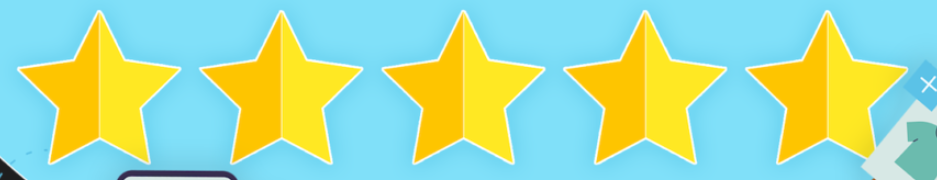

Project Overview:

Dataset : Review rating



Importing Libraries

In [1]:
#Normal Library
#-----------------------
import numpy as np
import pandas as pd


#Visulization Library
#---------------------
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#--------------------------------
#Warning library
import warnings
warnings.filterwarnings('ignore')


#anova testing
import scipy.stats as stats

#scaling the data
from sklearn.preprocessing import StandardScaler

#Train Test split
from sklearn.model_selection import train_test_split


#ML model - regeression
from sklearn.linear_model import LinearRegression

#ML model - regeression - Performance matrix
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_percentage_error, mean_squared_error



#ML model - Classification

#ML model - Classification - Performance matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score


#Improve the accuracy
from sklearn.model_selection import cross_val_score
###########################################################################################################


# Unsupervised Learning


from sklearn.cluster import KMeans

#Performance Matrix
from sklearn.metrics import silhouette_score



## Build Hierarchical Cluster
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage



In [2]:
df= pd.read_csv(r"/content/ReviewRatings.csv")

In [3]:
df.head()

,User,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,...,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(5456, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            5456 non-null   object 
 1   Churches        5456 non-null   float64
 2   Resorts         5456 non-null   float64
 3   Beaches         5456 non-null   float64
 4   Parks           5456 non-null   float64
 5   Theatres        5456 non-null   float64
 6   Museums         5456 non-null   float64
 7   Malls           5456 non-null   float64
 8   Zoo             5456 non-null   float64
 9   Restaurants     5456 non-null   float64
 10  Bars            5456 non-null   float64
 11  Local Services  5456 non-null   float64
 12  Fast Food       5456 non-null   float64
 13  Lodgings        5456 non-null   float64
 14  Juice Bars      5456 non-null   float64
 15  Art Galleries   5456 non-null   float64
 16  Dance Clubs     5456 non-null   float64
 17  Swimming Pools  5456 non-null   f

Checking Duplicate rows

In [6]:
def drop_dup(df):
  if df.duplicated().any() == True:
    df.drop_duplicates(inplace= True, Keep = "Last",reset_index = True)
    print("Data after removing duplicates row :" , df.dupdated().sum())
  else:
    return "No action required( No duplicate found)"

drop_dup(df)

'No action required( No duplicate found)'

In [7]:
df.drop("User", axis=1, inplace=True)

Checking Null Values

In [8]:
print(df.isnull().sum())
print("*****")
print(df.isnull().sum()/len(df)*100)

Churches          0
Resorts           0
Beaches           0
Parks             0
Theatres          0
Museums           0
Malls             0
Zoo               0
Restaurants       0
Bars              0
Local Services    0
Fast Food         0
Lodgings          0
Juice Bars        0
Art Galleries     0
Dance Clubs       0
Swimming Pools    0
Gyms              0
Bakeries          0
Spas              0
Cafes             0
View Points       0
Monuments         0
Gardens           0
dtype: int64
*****
Churches          0.0
Resorts           0.0
Beaches           0.0
Parks             0.0
Theatres          0.0
Museums           0.0
Malls             0.0
Zoo               0.0
Restaurants       0.0
Bars              0.0
Local Services    0.0
Fast Food         0.0
Lodgings          0.0
Juice Bars        0.0
Art Galleries     0.0
Dance Clubs       0.0
Swimming Pools    0.0
Gyms              0.0
Bakeries          0.0
Spas              0.0
Cafes             0.0
View Points       0.0
Monuments        

In [9]:
#Check unique counts

def check_unique_count(df):
  unique_counts = df.nunique()
  print(unique_counts)


check_unique_count(df)

Churches          281
Resorts           340
Beaches           328
Parks             293
Theatres          316
Museums           310
Malls             284
Zoo               334
Restaurants       353
Bars              332
Local Services    295
Fast Food         285
Lodgings          273
Juice Bars        260
Art Galleries     298
Dance Clubs       221
Swimming Pools    190
Gyms              167
Bakeries          218
Spas              255
Cafes             230
View Points       343
Monuments         308
Gardens           296
dtype: int64


In [10]:
#Check unique counts data entry in columns - No issue here

for i in df.columns:
  print(i)
  print("******")
  print(set(df[i].tolist()))
  print("___________")

Churches
******
{0.0, 0.5, 0.51, 0.53, 0.52, 0.54, 0.55, 0.56, 1.0, 1.17, 1.25, 5.0, 0.75, 1.5, 1.75, 2.5, 2.0, 2.25, 2.75, 3.75, 4.43, 1.43, 1.68, 1.18, 1.93, 4.57, 4.5, 2.18, 2.43, 2.36, 2.61, 2.68, 2.11, 3.61, 3.36, 3.68, 3.11, 1.36, 1.61, 1.11, 1.86, 0.79, 1.04, 1.54, 1.79, 0.63, 0.88, 2.29, 2.54, 1.29, 2.04, 0.72, 0.97, 4.86, 1.22, 1.47, 1.72, 1.97, 4.54, 4.47, 1.15, 1.4, 1.65, 1.9, 2.22, 2.47, 2.4, 2.15, 2.65, 3.65, 3.72, 1.33, 1.58, 1.08, 1.83, 2.33, 2.26, 2.08, 2.58, 2.51, 2.01, 0.76, 3.76, 2.76, 4.65, 1.26, 1.01, 1.51, 1.76, 4.33, 4.51, 0.69, 0.94, 1.19, 1.44, 1.69, 1.94, 2.19, 2.44, 2.69, 3.44, 3.69, 1.12, 1.37, 1.62, 1.87, 2.05, 2.12, 2.37, 2.55, 2.3, 2.62, 0.8, 3.62, 4.3, 1.8, 1.3, 1.55, 0.64, 0.89, 1.05, 4.44, 4.87, 4.55, 0.73, 0.98, 1.23, 1.48, 1.98, 0.82, 1.73, 2.48, 2.23, 2.73, 3.73, 1.41, 1.16, 1.66, 1.91, 0.57, 0.58, 0.59, 0.67, 0.92, 0.84, 0.6, 0.85, 0.68, 0.61, 2.09, 2.16, 2.41, 2.34, 2.91, 2.66, 2.59, 3.66, 4.52, 1.09, 1.34, 1.59, 0.93, 1.84, 4.48, 4.41, 4.59, 0.77

- The clustering model are build with following categories
> - Boarding Venue               : [`Resorts`,`Lodgings`]


In [11]:
x = df.loc[:,["Resorts","Lodgings"]]

In [12]:
x.head()

,Resorts,Lodgings
0,0.0,1.7
1,0.0,1.7
2,0.0,1.7
3,0.5,1.7
4,0.0,1.7


In [13]:
# scailing the dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

variable = sc_x
variable.shape

(5456, 2)

K means Clustering - elbow method : first find wcss value

In [14]:
# how many cluster we need it - Elbow method
wcss = []
for i in range(1,15):

  km = KMeans(n_clusters=i, random_state=1)
  km.fit(sc_x)
  wcss.append(km.inertia_)



In [15]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]


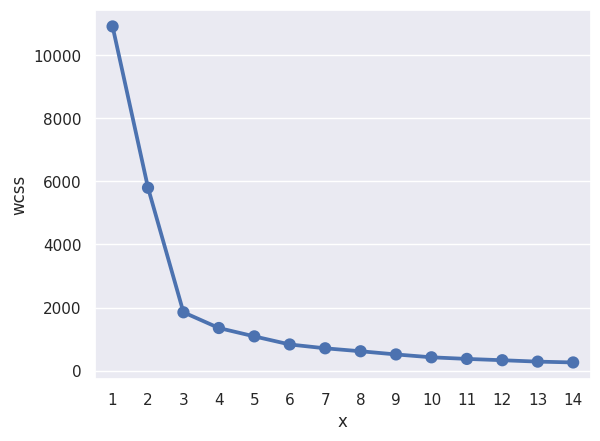

In [16]:
#Draw the pointplot to find the best elbow point

sns.pointplot(data=df, x=a, y=wcss)
plt.xlabel('x')
plt.ylabel('wcss')
plt.show()


In [17]:
# Basis the elbow method, we can say K = 5

k_means = KMeans(n_clusters=3, random_state=1)
k_means.fit(sc_x)
labels = k_means.labels_
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [18]:
y_kmeans = k_means.fit_predict(sc_x)
y_kmeans

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [19]:
#To verify our prediction is correct

#Evaluation for all 3 Cluster : find the silhouett score (0 to 1)

silhouette_score(sc_x, labels, random_state=1)


0.669768482660369

In [20]:
#To add a column Cluster_Kmeans_3 in real data

df["Cluster_Kmeans_3"] = labels

df.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Bars,...,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens,Cluster_Kmeans_3
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0


In [21]:
df["Cluster_Kmeans_3"].value_counts()

0    3321
2    1135
1    1000
Name: Cluster_Kmeans_3, dtype: int64

Visulization

In [22]:
sc_x

array([[-1.6320937 , -0.30255077],
       [-1.6320937 , -0.30255077],
       [-1.6320937 , -0.30255077],
       ...,
       [ 1.88579429, -0.74338854],
       [ 1.21739557, -0.75760911],
       [ 1.23146712, -0.79316054]])

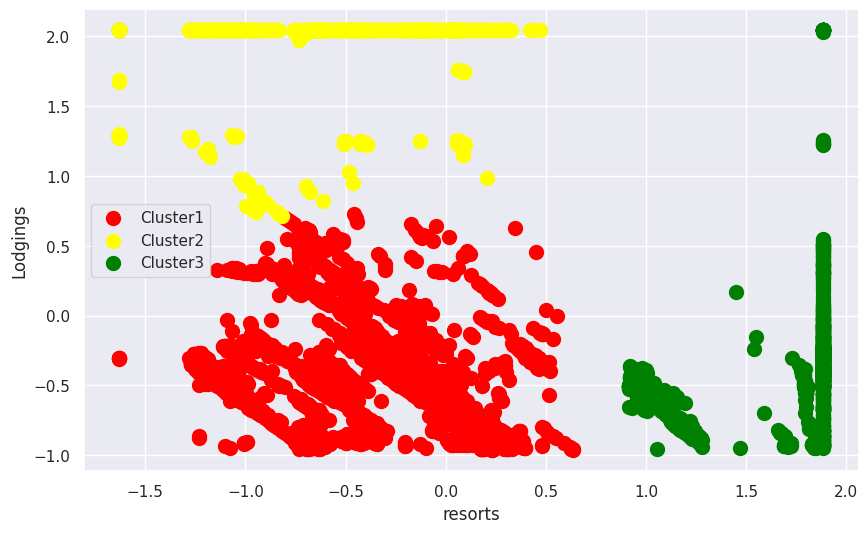

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(sc_x[y_kmeans==0,0], sc_x[y_kmeans==0,1], s=100, c='red',label='Cluster1')
plt.scatter(sc_x[y_kmeans==1,0], sc_x[y_kmeans==1,1], s=100, c='yellow',label='Cluster2')
plt.scatter(sc_x[y_kmeans==2,0], sc_x[y_kmeans==2,1], s=100, c='green',label='Cluster3')
plt.xlabel('resorts')
plt.ylabel('Lodgings')
plt.legend()
plt.show()

Unsupervised - Hierarchical Cluster

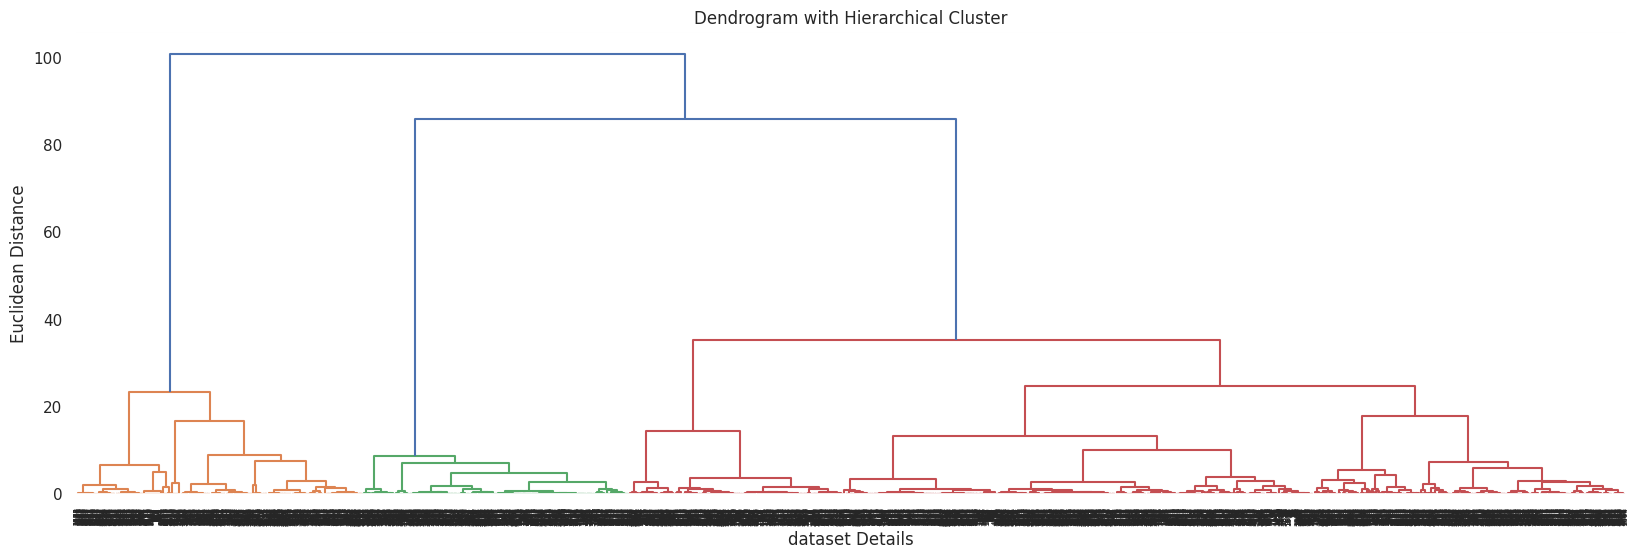

In [24]:
plt.figure(figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(sc_x, method='ward'))
plt.title("Dendrogram with Hierarchical Cluster")
plt.xlabel("dataset Details")
plt.ylabel("Euclidean Distance")
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward' )
hcluster

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [26]:
y_hcluster = hcluster.fit_predict(sc_x)
y_hcluster

array([0, 0, 0, ..., 2, 0, 0])

In [27]:
combined_cluster = pd.concat([df, pd.DataFrame(y_hcluster)], axis=1)
combined_cluster

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Bars,...,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens,Cluster_Kmeans_3,0
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0,0
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0,0
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0,0
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0,0
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,2,2
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,2,2
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,2,2
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,2,0


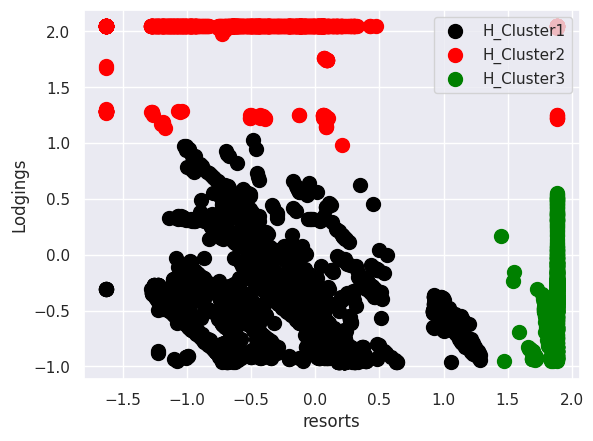

In [28]:
# visualization
plt.scatter(sc_x[y_hcluster==0,0], sc_x[y_hcluster==0,1], s=100, c='black', label='H_Cluster1')
plt.scatter(sc_x[y_hcluster==1,0], sc_x[y_hcluster==1,1], s=100, c='red', label='H_Cluster2')
plt.scatter(sc_x[y_hcluster==2,0], sc_x[y_hcluster==2,1], s=100, c='green', label='H_Cluster3')
plt.xlabel('resorts')
plt.ylabel('Lodgings')
plt.legend()
plt.show()
